C:\Research\LayInvest\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Pramudi\AppData\Local\Temp\ipykernel_16092\1523086380.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)
13:24:45 - cmdstanpy - INFO - Chain [1] start processing
13:24:46 - cmdstanpy - INFO - Chain [1] done processing


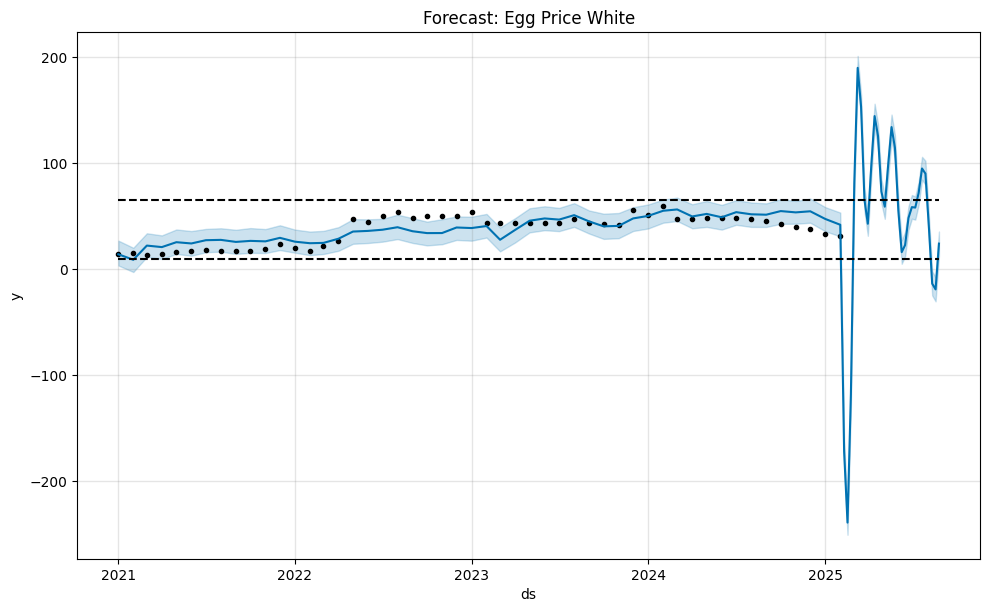

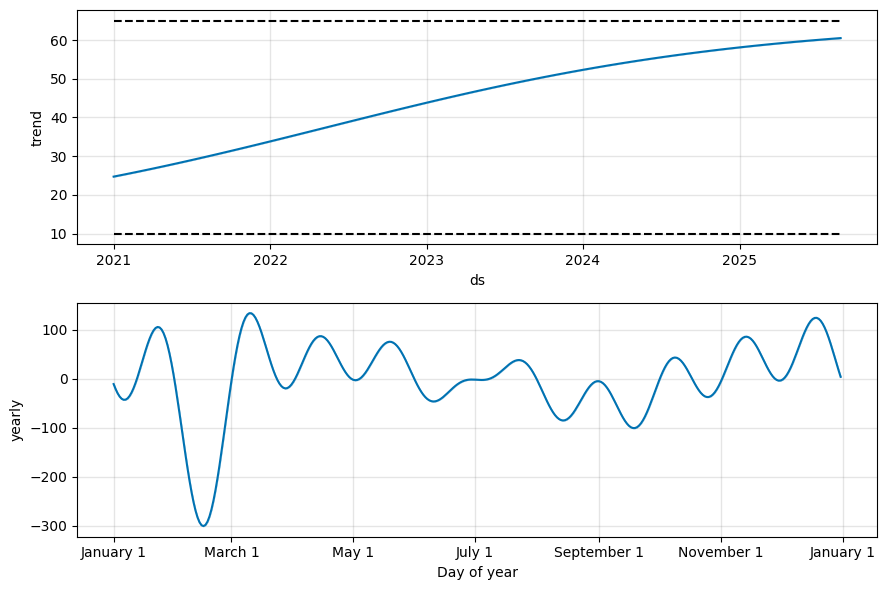

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|                                                                                                                                  | 0/35 [00:00<?, ?it/s]13:24:47 - cmdstanpy - INFO - Chain [1] start processing
13:24:48 - cmdstanpy - INFO - Chain [1] done processing
  3%|███▍                                                                                                                      | 1/35 [00:01<00:43,  1.28s/it]13:24:48 - cmdstanpy - INFO - Chain [1] start processing
13:24:50 - cmdstanpy - INFO - Chain [1] done processing
  6%|██████▉                                                                                                                   | 2/35 [00:02<00:49,  1.49s/it]13:24:50 - cmdstanpy - INFO - Chain [1] start processing
13:24:50 - cmdstanpy - INFO - Chain [1] done processing
  9%|██████████▍                                                                   

   horizon       rmse      mape
0  17 days  53.750118  0.777034
1  18 days  37.914628  0.549582
2  19 days  24.780550  0.454497
3  20 days  26.697905  0.512407
4  21 days  26.111716  0.528984
5  22 days  24.744868  0.500793
6  23 days  22.842372  0.463737
7  24 days  19.439049  0.367453
8  25 days  16.357340  0.307769
9  26 days  15.114205  0.281546
10 27 days  14.756857  0.289790
11 28 days  19.131596  0.388674
12 42 days  19.357289  0.438251
13 43 days  20.105595  0.473647
14 44 days  21.738972  0.508820
15 45 days  25.902755  0.565211
16 46 days  25.237694  0.527094
17 47 days  24.438594  0.434073
18 48 days  25.565048  0.440398
19 49 days  21.863405  0.409283
20 50 days  23.091249  0.445921
21 51 days  21.697640  0.432401
22 52 days  20.064554  0.404195
23 53 days  18.079297  0.373347
24 54 days  15.569374  0.298659
25 55 days  13.646521  0.260147
26 56 days  13.128063  0.246141
27 57 days  13.176408  0.252388
28 58 days  16.040199  0.321594
29 59 days  17.123236  0.369436
30 73 da

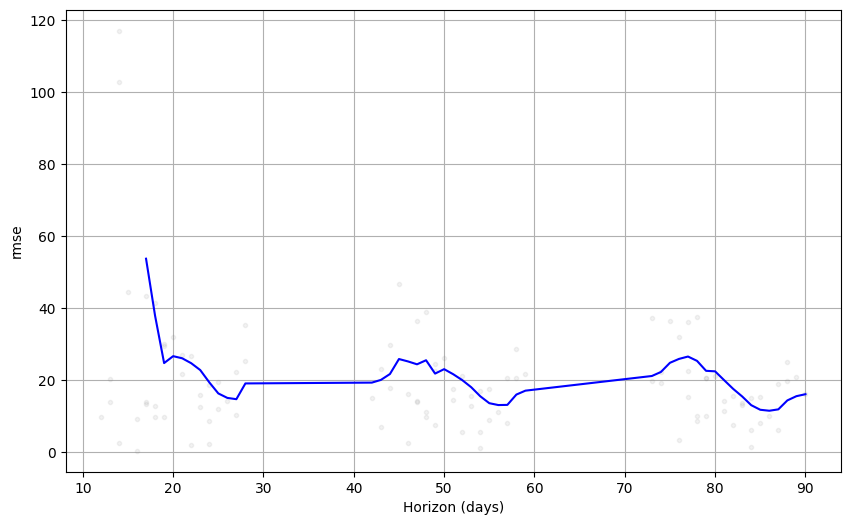

In [1]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt
import psycopg2
import os

# --- Connect to DB ---
conn = psycopg2.connect(
    host=os.getenv("PGHOST","localhost"),
    port=os.getenv("PGPORT","5432"),
    dbname=os.getenv("PGDATABASE","layinvest_db"),
    user=os.getenv("PGUSER","postgres"),
    password=os.getenv("PGPASSWORD","admin123")
)

# --- Load one series (egg_price_white as example) ---
sql = """
    SELECT ds, value
    FROM oc.price_history_raw
    WHERE series_name='egg_price_white'
    ORDER BY ds
"""
df = pd.read_sql(sql, conn)
df["ds"] = pd.to_datetime(df["ds"])
df.rename(columns={"value":"y"}, inplace=True)

# --- Add Prophet bounds ---
df["floor"], df["cap"] = 10, 65

# --- Fit model ---
model = Prophet(growth="logistic", yearly_seasonality=True)
model.fit(df)

# --- Forecast future weeks ---
future = model.make_future_dataframe(periods=30, freq="W")
future["floor"], future["cap"] = 10, 65
forecast = model.predict(future)

# --- Plot forecast ---
fig1 = model.plot(forecast)
plt.title("Forecast: Egg Price White")
plt.show()

# --- Plot components (trend & seasonality) ---
fig2 = model.plot_components(forecast)
plt.show()

# --- Cross-validation (backtest) ---
cv = cross_validation(model, initial="365 days", period="30 days", horizon="90 days")
metrics = performance_metrics(cv)
print(metrics[["horizon","rmse","mape"]])

# --- Plot forecast error metric ---
fig3 = plot_cross_validation_metric(cv, metric='rmse')
plt.show()


📈 Forecasting: feed_starter


C:\Users\Pramudi\AppData\Local\Temp\ipykernel_16092\1942636179.py:45: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)
13:34:11 - cmdstanpy - INFO - Chain [1] start processing
13:34:12 - cmdstanpy - INFO - Chain [1] done processing


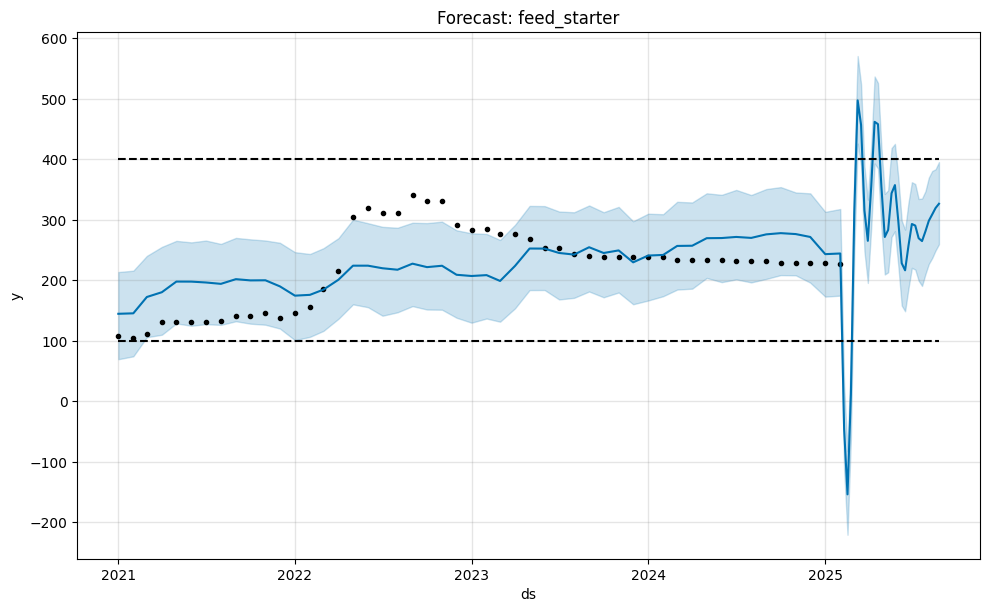

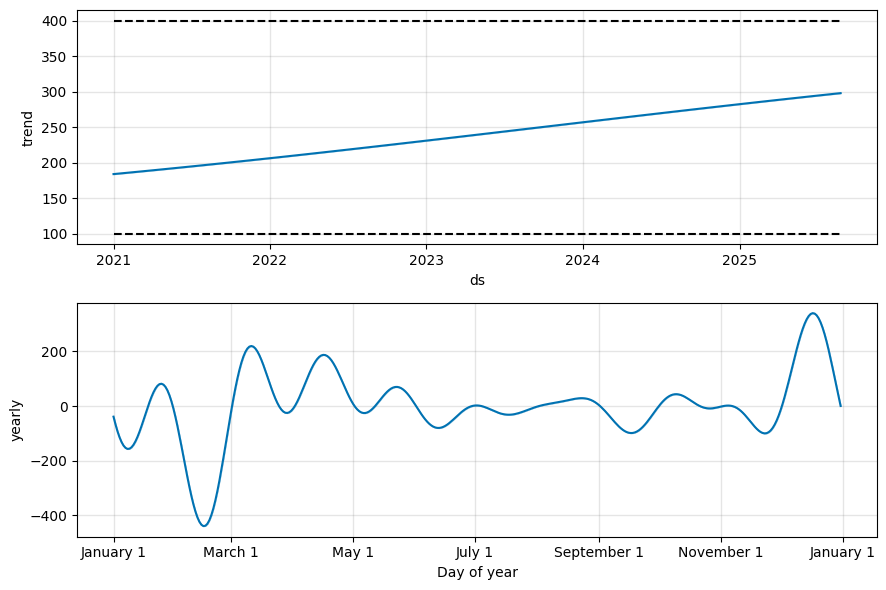

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|                                                                                                                                  | 0/35 [00:00<?, ?it/s]13:34:14 - cmdstanpy - INFO - Chain [1] start processing
13:34:15 - cmdstanpy - INFO - Chain [1] done processing
  3%|███▍                                                                                                                      | 1/35 [00:00<00:30,  1.11it/s]13:34:15 - cmdstanpy - INFO - Chain [1] start processing
13:34:16 - cmdstanpy - INFO - Chain [1] done processing
  6%|██████▉                                                                                                                   | 2/35 [00:02<00:37,  1.13s/it]13:34:16 - cmdstanpy - INFO - Chain [1] start processing
13:34:17 - cmdstanpy - INFO - Chain [1] done processing
  9%|██████████▍                                                                   

   horizon        rmse      mape
0  17 days  122.583490  0.357653
1  18 days  129.401183  0.387119
2  19 days  147.977554  0.474442
3  20 days  158.761577  0.540832
4  21 days  178.272351  0.645168
5  22 days  183.131213  0.686545
6  23 days  176.038850  0.670133
7  24 days  161.548653  0.638798
8  25 days  146.338293  0.586373
9  26 days  133.565165  0.543204
10 27 days  120.894818  0.506771
11 28 days  121.820274  0.515881
12 42 days  113.869074  0.466644
13 43 days  112.539156  0.418794
14 44 days  107.649180  0.375155


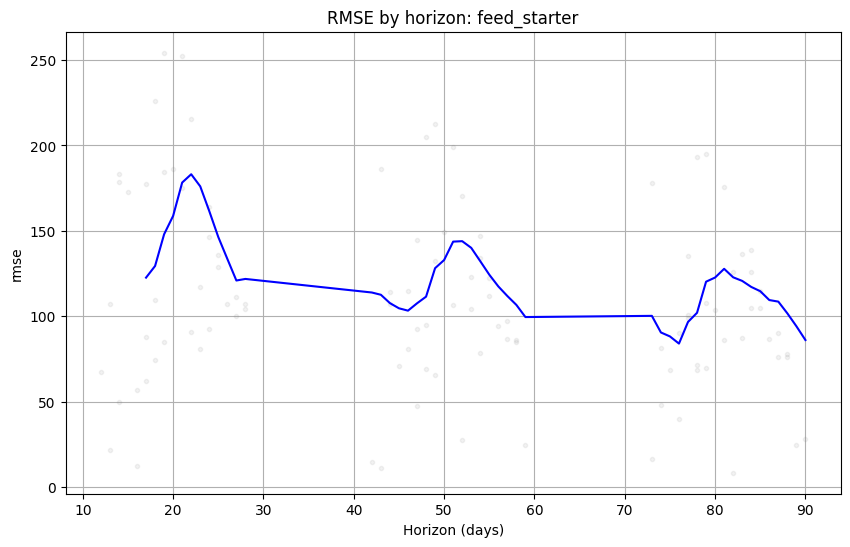

C:\Users\Pramudi\AppData\Local\Temp\ipykernel_16092\1942636179.py:45: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)
13:34:39 - cmdstanpy - INFO - Chain [1] start processing


📈 Forecasting: feed_grower


13:34:40 - cmdstanpy - INFO - Chain [1] done processing


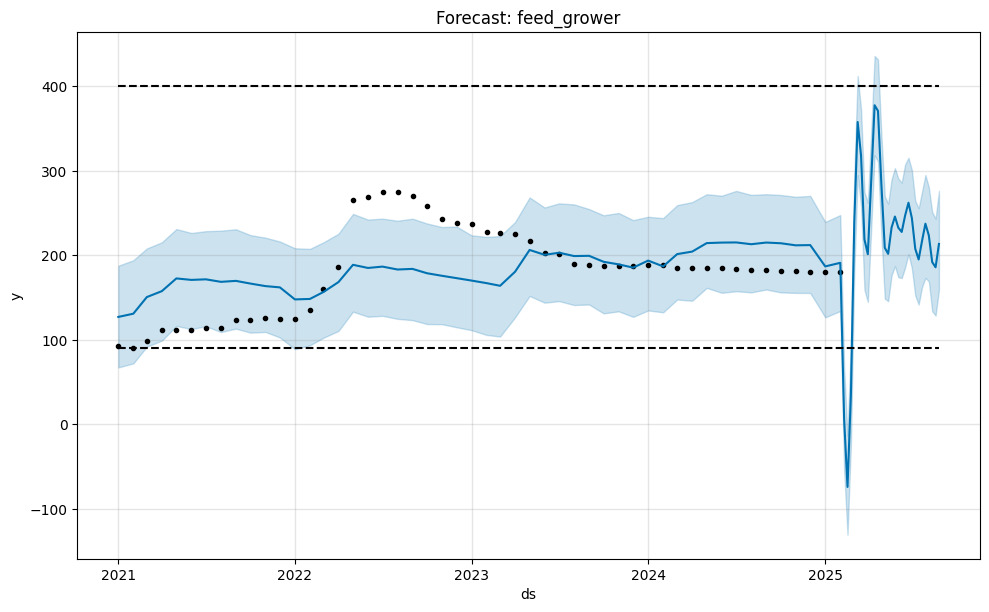

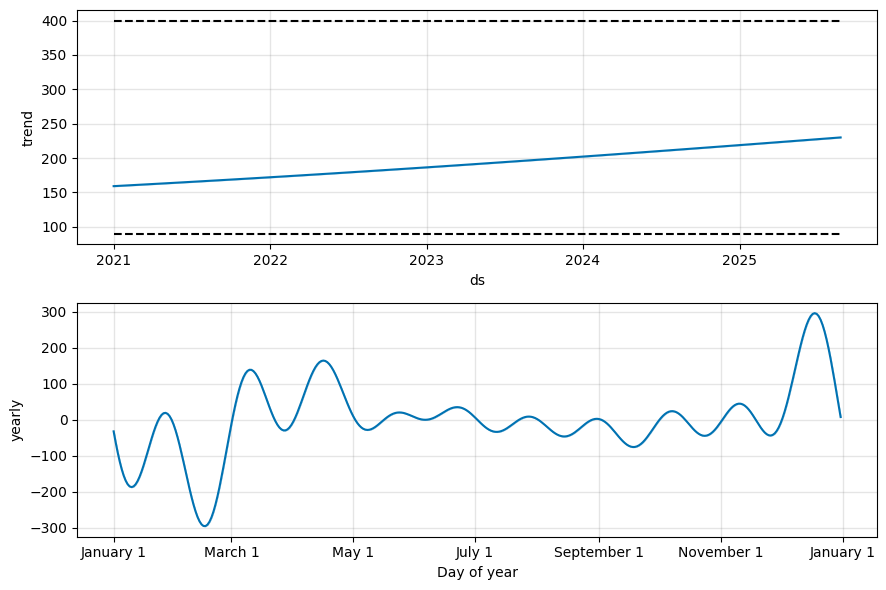

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|                                                                                                                                  | 0/35 [00:00<?, ?it/s]13:34:42 - cmdstanpy - INFO - Chain [1] start processing
13:34:43 - cmdstanpy - INFO - Chain [1] done processing
  3%|███▍                                                                                                                      | 1/35 [00:00<00:33,  1.03it/s]13:34:43 - cmdstanpy - INFO - Chain [1] start processing
13:34:44 - cmdstanpy - INFO - Chain [1] done processing
  6%|██████▉                                                                                                                   | 2/35 [00:01<00:32,  1.02it/s]13:34:44 - cmdstanpy - INFO - Chain [1] start processing
13:34:50 - cmdstanpy - INFO - Chain [1] done processing
  9%|██████████▍                                                                   

   horizon        rmse      mape
0  17 days  150.827762  0.465566
1  18 days  145.562997  0.522364
2  19 days  157.310369  0.648370
3  20 days  168.089610  0.729701
4  21 days  169.624103  0.784488
5  22 days  162.365336  0.775820
6  23 days  154.628067  0.745183
7  24 days  131.976438  0.651006
8  25 days  110.351435  0.561988
9  26 days   97.862730  0.512548
10 27 days   90.245502  0.477653
11 28 days   88.745165  0.474724
12 42 days   83.639765  0.438724
13 43 days   76.403838  0.380630
14 44 days   85.455571  0.360767


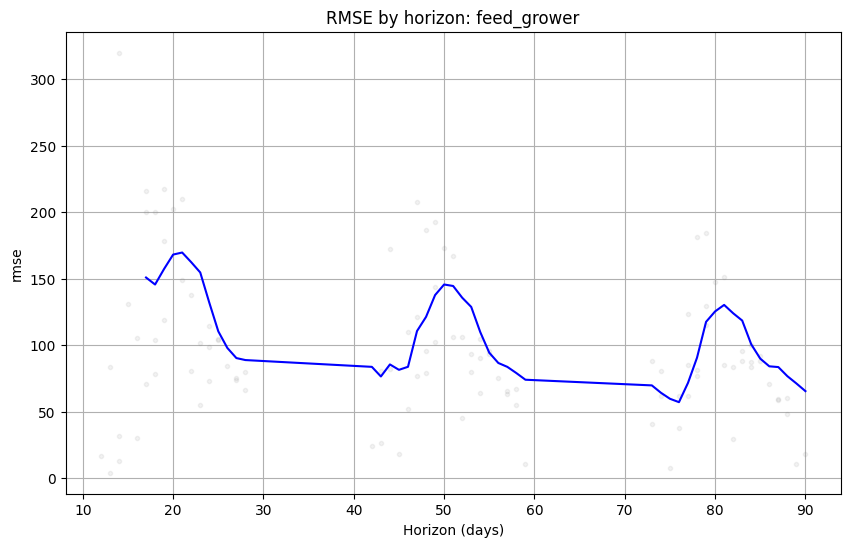

C:\Users\Pramudi\AppData\Local\Temp\ipykernel_16092\1942636179.py:45: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)
13:35:08 - cmdstanpy - INFO - Chain [1] start processing


📈 Forecasting: feed_layer


13:35:08 - cmdstanpy - INFO - Chain [1] done processing


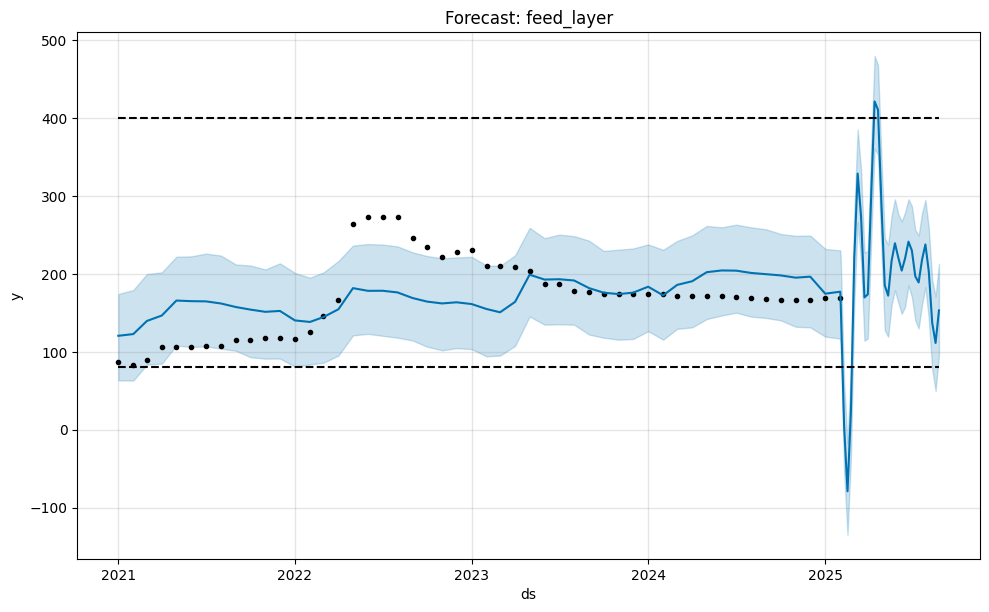

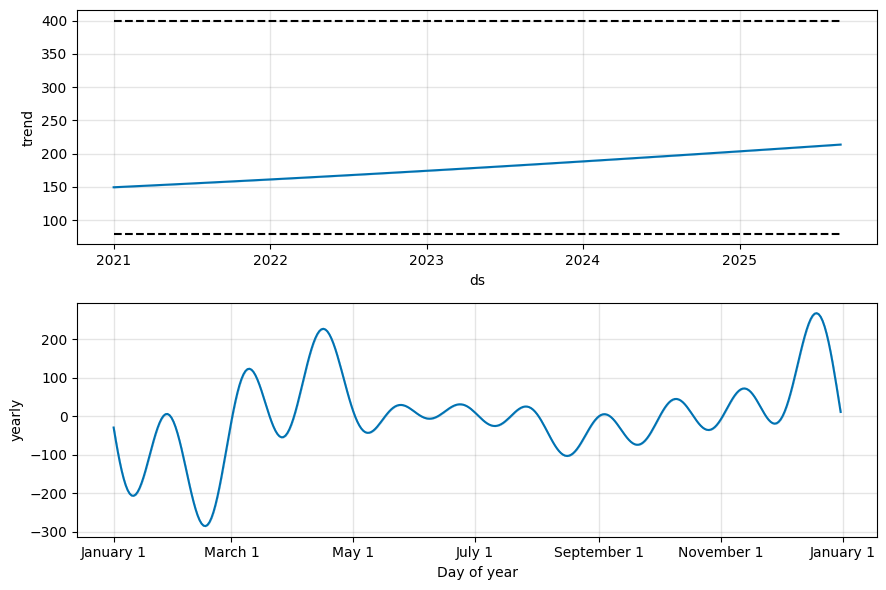

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|                                                                                                                                  | 0/35 [00:00<?, ?it/s]13:35:09 - cmdstanpy - INFO - Chain [1] start processing
13:35:10 - cmdstanpy - INFO - Chain [1] done processing
  3%|███▍                                                                                                                      | 1/35 [00:00<00:15,  2.19it/s]13:35:10 - cmdstanpy - INFO - Chain [1] start processing
13:35:11 - cmdstanpy - INFO - Chain [1] done processing
  6%|██████▉                                                                                                                   | 2/35 [00:01<00:28,  1.17it/s]13:35:11 - cmdstanpy - INFO - Chain [1] start processing
13:35:12 - cmdstanpy - INFO - Chain [1] done processing
  9%|██████████▍                                                                   

   horizon        rmse      mape
0  17 days  211.640872  0.730919
1  18 days  199.635425  0.731222
2  19 days  174.148044  0.758665
3  20 days  180.560243  0.822248
4  21 days  173.161403  0.842225
5  22 days  161.832956  0.815043
6  23 days  154.763941  0.788479
7  24 days  125.337709  0.655995
8  25 days  103.239973  0.569169
9  26 days   93.737782  0.530017
10 27 days   88.402410  0.502136
11 28 days   86.040409  0.495825
12 42 days   81.202889  0.451552
13 43 days   80.202971  0.396377
14 44 days   71.614766  0.321300


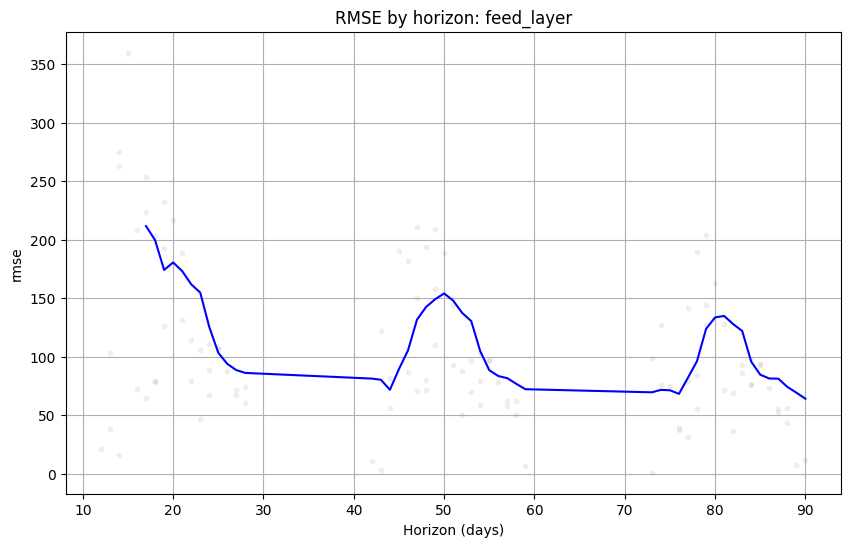

C:\Users\Pramudi\AppData\Local\Temp\ipykernel_16092\1942636179.py:45: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)
13:35:54 - cmdstanpy - INFO - Chain [1] start processing


📈 Forecasting: doc_price


13:35:55 - cmdstanpy - INFO - Chain [1] done processing


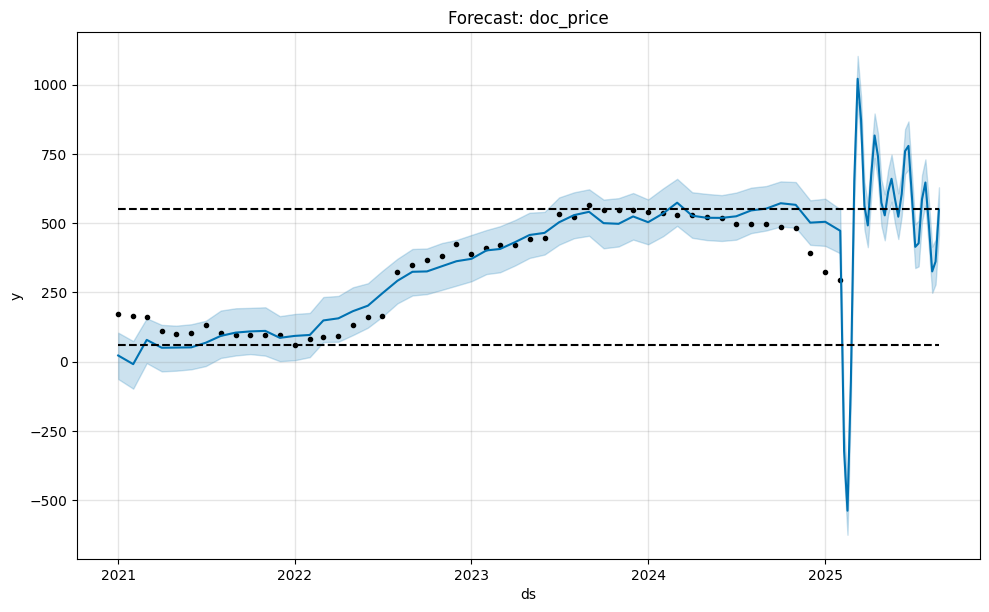

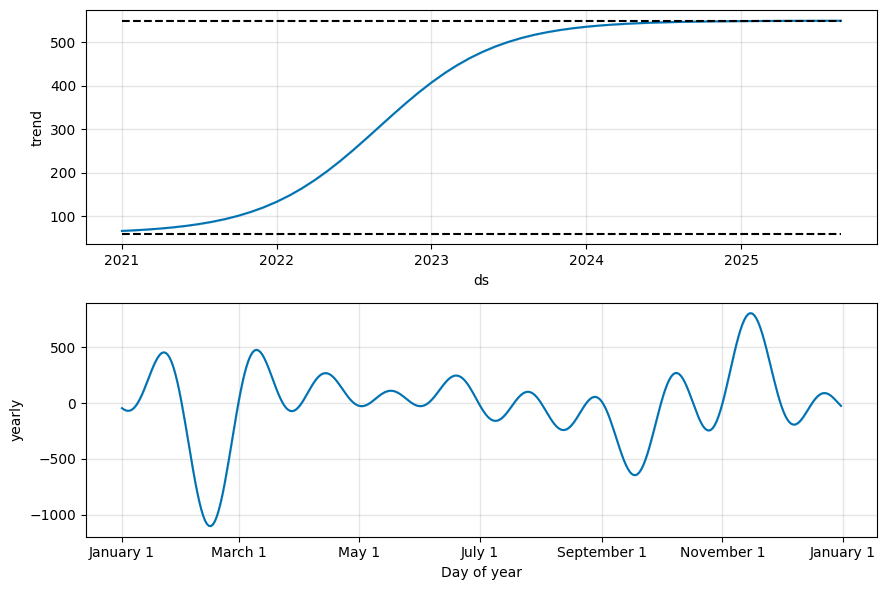

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|                                                                                                                                  | 0/35 [00:00<?, ?it/s]13:35:56 - cmdstanpy - INFO - Chain [1] start processing
13:35:56 - cmdstanpy - INFO - Chain [1] done processing
  3%|███▍                                                                                                                      | 1/35 [00:00<00:23,  1.43it/s]13:35:56 - cmdstanpy - INFO - Chain [1] start processing
13:35:58 - cmdstanpy - INFO - Chain [1] done processing
  6%|██████▉                                                                                                                   | 2/35 [00:02<00:36,  1.11s/it]13:35:58 - cmdstanpy - INFO - Chain [1] start processing
13:36:01 - cmdstanpy - INFO - Chain [1] done processing
  9%|██████████▍                                                                   

   horizon        rmse      mape
0  17 days  348.803285  0.770197
1  18 days  356.926789  0.737814
2  19 days  283.814537  0.503671
3  20 days  202.508200  0.353317
4  21 days  143.117170  0.234752
5  22 days   98.887612  0.168815
6  23 days   73.548779  0.117320
7  24 days   58.146474  0.070453
8  25 days   53.247126  0.069097
9  26 days   67.440272  0.091863
10 27 days   79.675726  0.120105
11 28 days  108.254954  0.189346
12 42 days  110.198431  0.262726
13 43 days  113.328908  0.365262
14 44 days  122.052593  0.464891


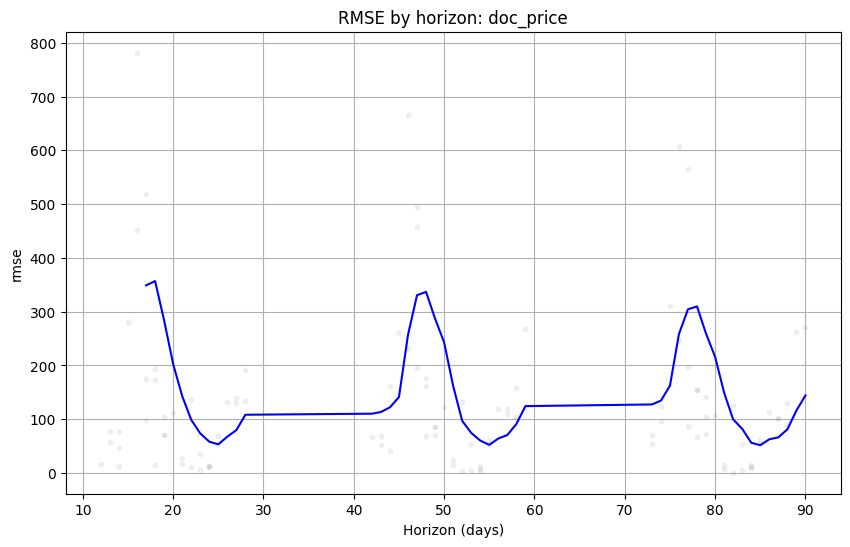

C:\Users\Pramudi\AppData\Local\Temp\ipykernel_16092\1942636179.py:45: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)
13:36:52 - cmdstanpy - INFO - Chain [1] start processing


📈 Forecasting: cull_price


13:36:52 - cmdstanpy - INFO - Chain [1] done processing


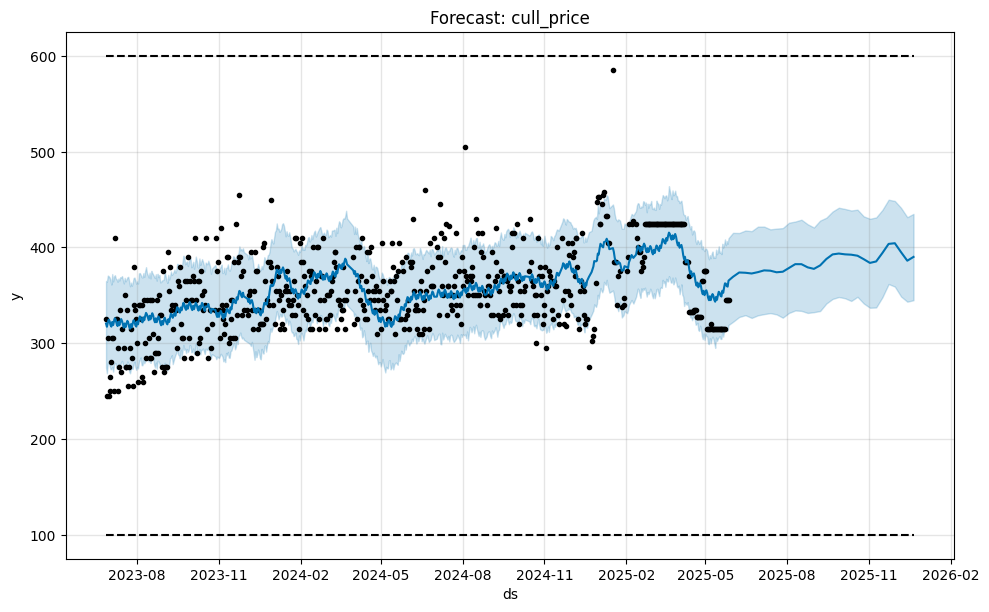

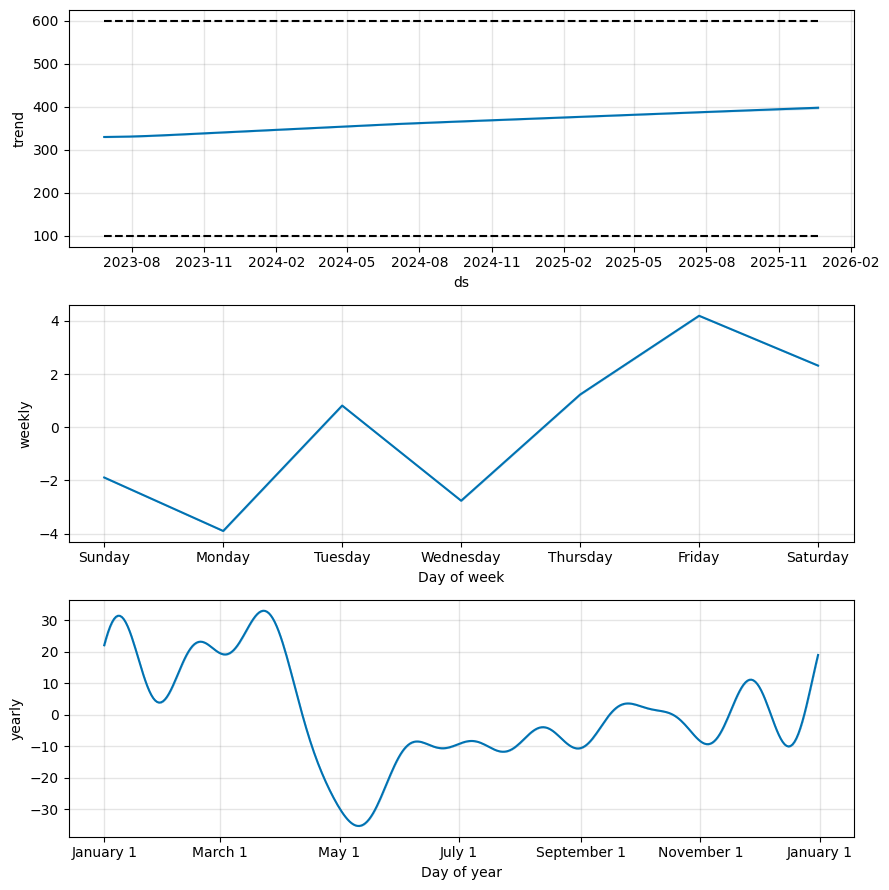

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|                                                                                                                                   | 0/9 [00:00<?, ?it/s]13:36:54 - cmdstanpy - INFO - Chain [1] start processing
13:36:54 - cmdstanpy - INFO - Chain [1] done processing
 11%|█████████████▋                                                                                                             | 1/9 [00:00<00:03,  2.03it/s]13:36:55 - cmdstanpy - INFO - Chain [1] start processing
13:36:55 - cmdstanpy - INFO - Chain [1] done processing
 22%|███████████████████████████▎                                                                                               | 2/9 [00:01<00:03,  1.87it/s]13:36:55 - cmdstanpy - INFO - Chain [1] start processing
13:36:55 - cmdstanpy - INFO - Chain [1] done processing
 33%|█████████████████████████████████████████                                     

   horizon       rmse      mape
0   9 days  43.620404  0.093210
1  10 days  43.961274  0.092663
2  11 days  43.668008  0.091941
3  12 days  44.377236  0.094671
4  13 days  42.039513  0.095250
5  14 days  40.441461  0.091907
6  15 days  40.160442  0.092600
7  16 days  41.223079  0.096010
8  17 days  40.828350  0.095912
9  18 days  41.412505  0.099090
10 19 days  43.538579  0.106545
11 20 days  49.520345  0.111476
12 21 days  49.155876  0.110187
13 22 days  48.161037  0.105883
14 23 days  50.997549  0.112292


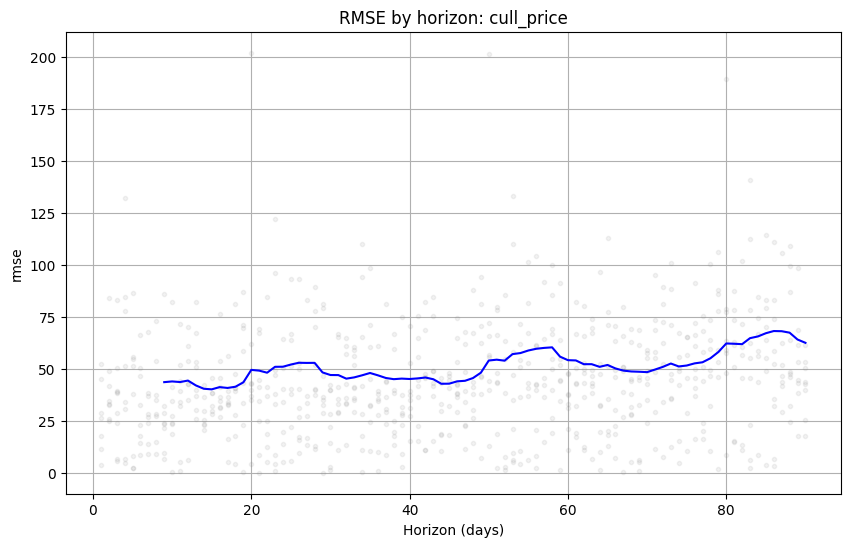

C:\Users\Pramudi\AppData\Local\Temp\ipykernel_16092\1942636179.py:45: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)
13:37:00 - cmdstanpy - INFO - Chain [1] start processing


📈 Forecasting: egg_price_white


13:37:00 - cmdstanpy - INFO - Chain [1] done processing


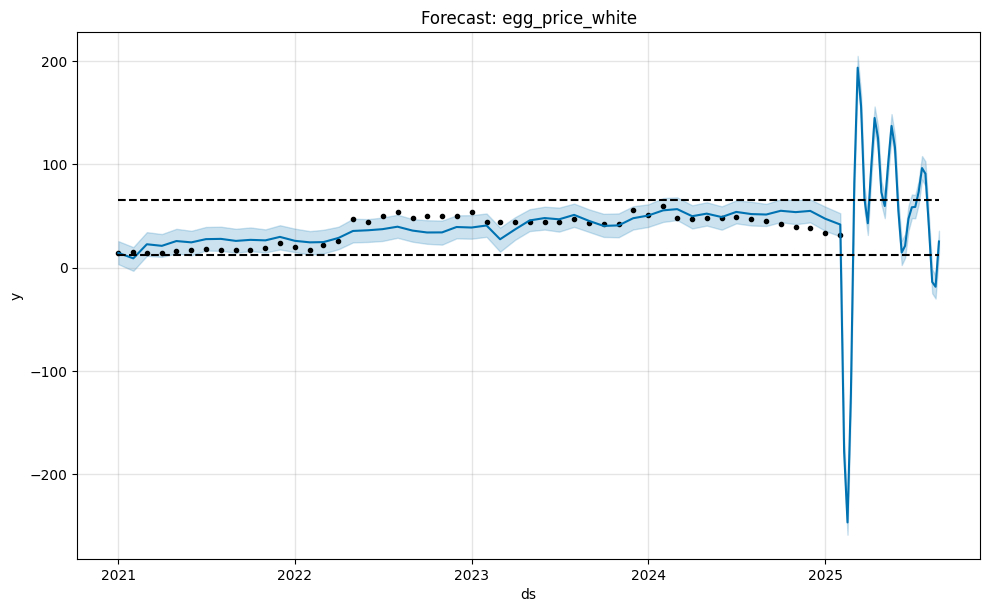

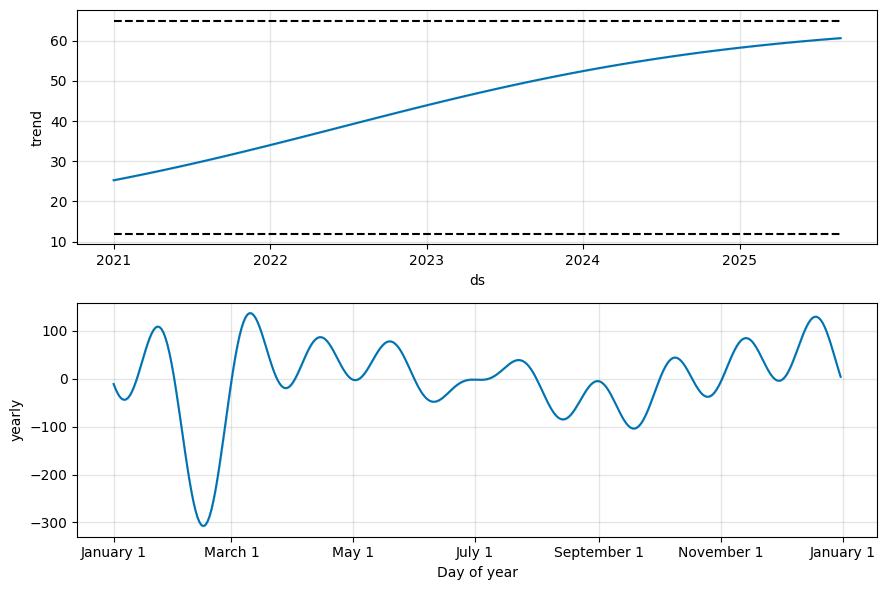

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|                                                                                                                                  | 0/35 [00:00<?, ?it/s]13:37:02 - cmdstanpy - INFO - Chain [1] start processing
13:37:02 - cmdstanpy - INFO - Chain [1] done processing
  3%|███▍                                                                                                                      | 1/35 [00:00<00:19,  1.71it/s]13:37:02 - cmdstanpy - INFO - Chain [1] start processing
13:37:03 - cmdstanpy - INFO - Chain [1] done processing
  6%|██████▉                                                                                                                   | 2/35 [00:01<00:19,  1.67it/s]13:37:03 - cmdstanpy - INFO - Chain [1] start processing
13:37:03 - cmdstanpy - INFO - Chain [1] done processing
  9%|██████████▍                                                                   

   horizon       rmse      mape
0  17 days  52.232914  0.787389
1  18 days  42.300110  0.633189
2  19 days  25.188236  0.481382
3  20 days  26.736673  0.525667
4  21 days  26.324336  0.540994
5  22 days  25.080163  0.510558
6  23 days  23.351404  0.475746
7  24 days  19.861552  0.375648
8  25 days  16.680735  0.313568
9  26 days  15.348471  0.285761
10 27 days  14.930490  0.294089
11 28 days  19.295858  0.392249
12 42 days  18.924934  0.384052
13 43 days  20.030247  0.429399
14 44 days  21.822698  0.469038


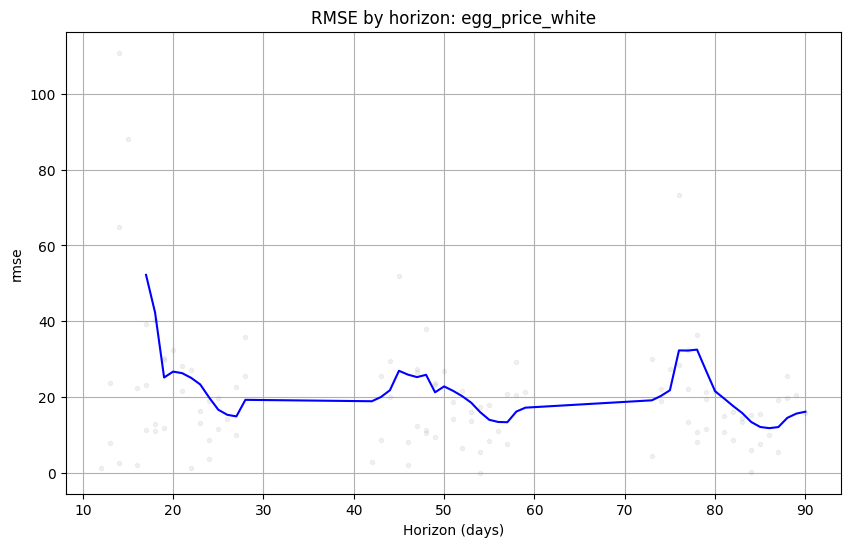

C:\Users\Pramudi\AppData\Local\Temp\ipykernel_16092\1942636179.py:45: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)
13:37:25 - cmdstanpy - INFO - Chain [1] start processing


📈 Forecasting: egg_price_brown


13:37:25 - cmdstanpy - INFO - Chain [1] done processing


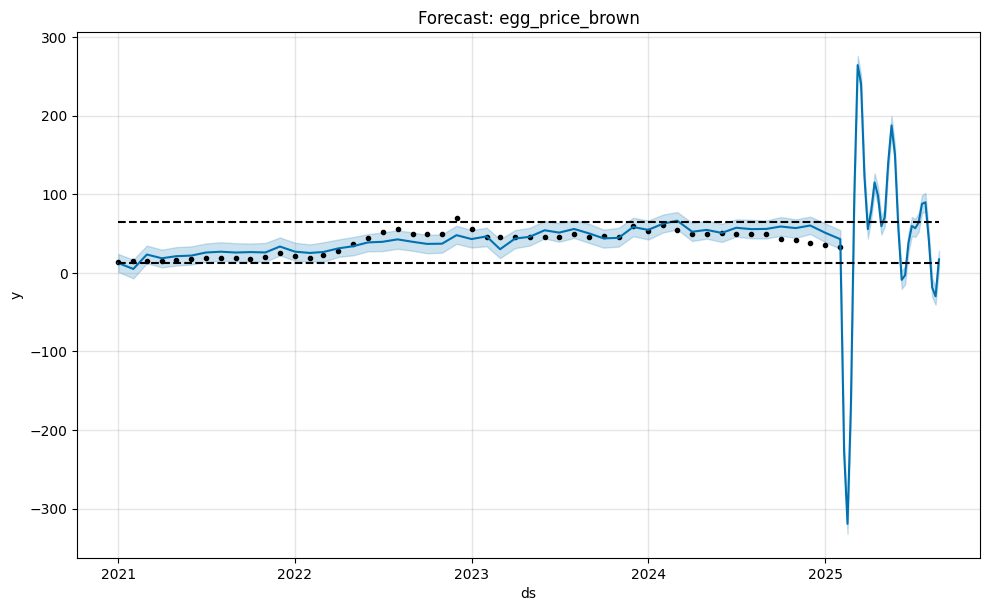

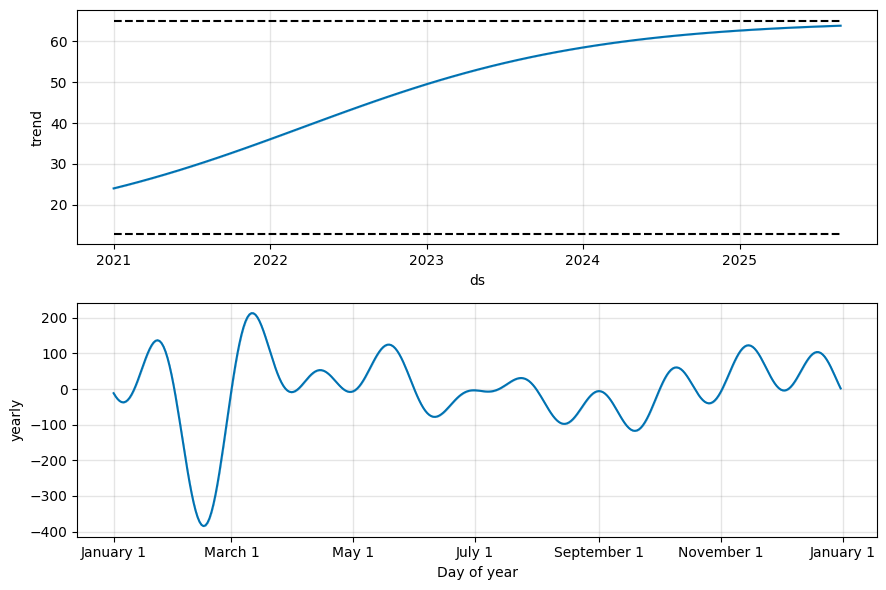

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|                                                                                                                                  | 0/35 [00:00<?, ?it/s]13:37:27 - cmdstanpy - INFO - Chain [1] start processing
13:37:28 - cmdstanpy - INFO - Chain [1] done processing
  3%|███▍                                                                                                                      | 1/35 [00:00<00:19,  1.75it/s]13:37:28 - cmdstanpy - INFO - Chain [1] start processing
13:37:28 - cmdstanpy - INFO - Chain [1] done processing
  6%|██████▉                                                                                                                   | 2/35 [00:01<00:20,  1.61it/s]13:37:28 - cmdstanpy - INFO - Chain [1] start processing
13:37:32 - cmdstanpy - INFO - Chain [1] done processing
  9%|██████████▍                                                                   

   horizon       rmse      mape
0  17 days  46.296767  0.664229
1  18 days  32.453876  0.469295
2  19 days  23.138685  0.407823
3  20 days  23.624599  0.429447
4  21 days  25.075790  0.477208
5  22 days  25.426188  0.488800
6  23 days  24.847219  0.465445
7  24 days  19.581662  0.340314
8  25 days  15.537726  0.278955
9  26 days  14.346381  0.259557
10 27 days  13.933033  0.256569
11 28 days  20.348136  0.383584
12 42 days  20.124323  0.371203
13 43 days  19.877493  0.377686
14 44 days  20.556302  0.395794


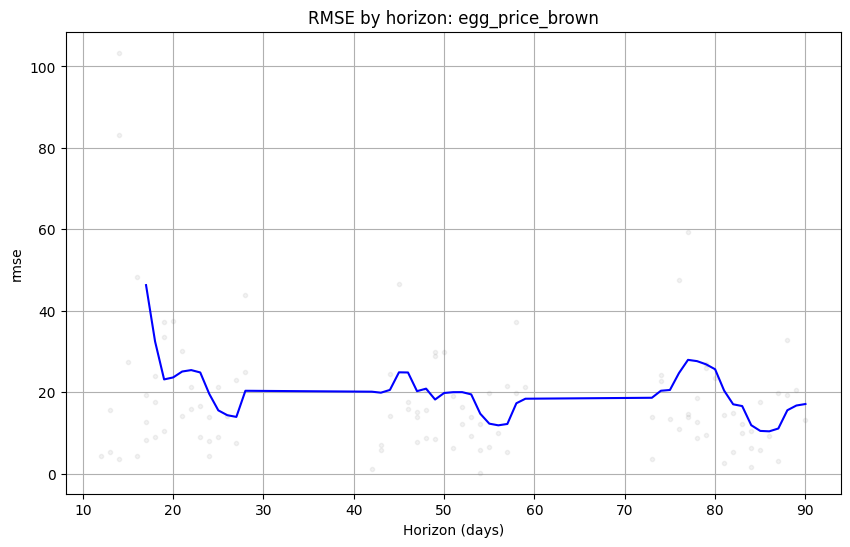

📈 Forecasting: egg_price_small


C:\Users\Pramudi\AppData\Local\Temp\ipykernel_16092\1942636179.py:45: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)
13:37:54 - cmdstanpy - INFO - Chain [1] start processing
13:37:54 - cmdstanpy - INFO - Chain [1] done processing


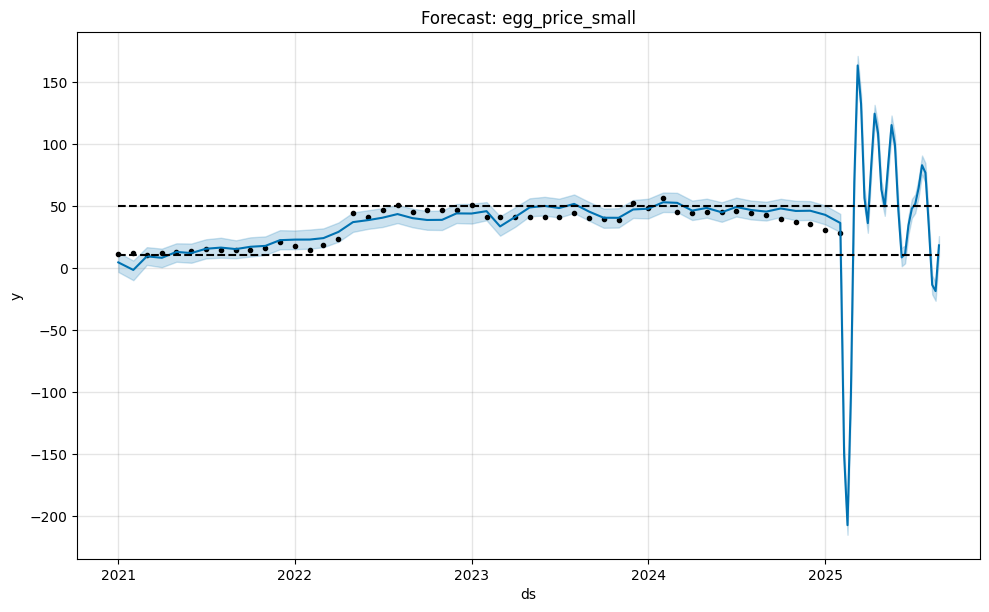

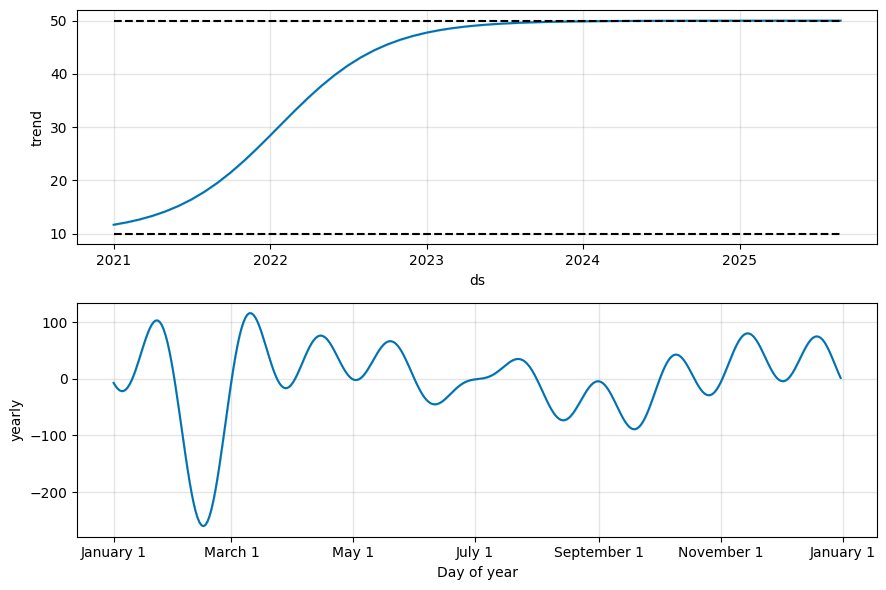

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|                                                                                                                                  | 0/35 [00:00<?, ?it/s]13:37:55 - cmdstanpy - INFO - Chain [1] start processing
13:37:57 - cmdstanpy - INFO - Chain [1] done processing
  3%|███▍                                                                                                                      | 1/35 [00:01<01:01,  1.80s/it]13:37:57 - cmdstanpy - INFO - Chain [1] start processing
13:37:58 - cmdstanpy - INFO - Chain [1] done processing
  6%|██████▉                                                                                                                   | 2/35 [00:02<00:39,  1.20s/it]13:37:58 - cmdstanpy - INFO - Chain [1] start processing
13:37:58 - cmdstanpy - INFO - Chain [1] done processing
  9%|██████████▍                                                                   

   horizon       rmse      mape
0  17 days  46.713379  0.745098
1  18 days  33.736258  0.489670
2  19 days  15.956677  0.299129
3  20 days  17.438522  0.335703
4  21 days  17.538344  0.359859
5  22 days  16.902731  0.351567
6  23 days  15.198075  0.316594
7  24 days  12.731158  0.247439
8  25 days   9.341764  0.177039
9  26 days   7.987132  0.147968
10 27 days   6.787580  0.136061
11 28 days  10.218418  0.210782
12 42 days  10.114890  0.224717
13 43 days  11.988181  0.277125
14 44 days  16.708896  0.375364


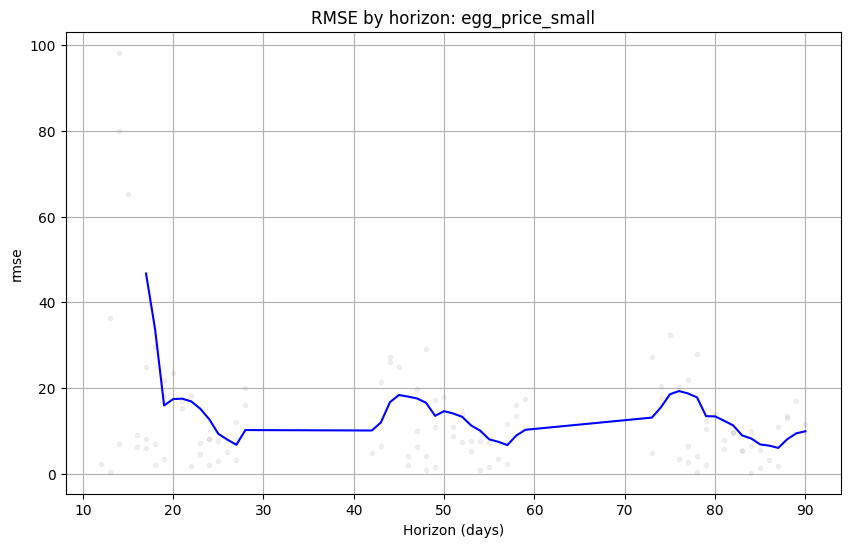

In [2]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt
import psycopg2, os

# Series & bounds from your forecast.py
SERIES = {
    "feed_starter": {"min":100,"max":400},
    "feed_grower":  {"min":90,"max":400},
    "feed_layer":   {"min":80,"max":400},
    "doc_price":    {"min":60,"max":550},
    "cull_price":   {"min":100,"max":600},
    "egg_price_white": {"min":12,"max":65},
    "egg_price_brown": {"min":13,"max":65},
    "egg_price_small": {"min":10,"max":50},
}

# DB connection
conn = psycopg2.connect(
    host=os.getenv("PGHOST","localhost"),
    port=os.getenv("PGPORT","5432"),
    dbname=os.getenv("PGDATABASE","layinvest_db"),
    user=os.getenv("PGUSER","postgres"),
    password=os.getenv("PGPASSWORD","admin123")
)

# Folder to save results
os.makedirs("forecast_results", exist_ok=True)

# Loop through each series
for series, bounds in SERIES.items():
    print("="*60)
    print(f"📈 Forecasting: {series}")
    print("="*60)

    # Load history
    sql = f"""
        SELECT ds, value
        FROM oc.price_history_raw
        WHERE series_name='{series}'
        ORDER BY ds
    """
    df = pd.read_sql(sql, conn)
    if df.empty:
        print("⚠️ No data found, skipping...\n")
        continue
    
    df["ds"] = pd.to_datetime(df["ds"])
    df.rename(columns={"value":"y"}, inplace=True)

    # Apply bounds
    df["floor"], df["cap"] = bounds["min"], bounds["max"]

    # Fit model
    model = Prophet(growth="logistic", yearly_seasonality=True)
    model.fit(df)

    # Forecast next 30 weeks
    future = model.make_future_dataframe(periods=30, freq="W")
    future["floor"], future["cap"] = bounds["min"], bounds["max"]
    forecast = model.predict(future)

    # === PLOTS ===
    fig1 = model.plot(forecast)
    plt.title(f"Forecast: {series}")
    plt.savefig(f"forecast_results/{series}_forecast.png")
    plt.show()

    fig2 = model.plot_components(forecast)
    plt.savefig(f"forecast_results/{series}_components.png")
    plt.show()

    # Cross-validation
    try:
        cv = cross_validation(model, initial="365 days", period="30 days", horizon="90 days")
        metrics = performance_metrics(cv)
        print(metrics[["horizon","rmse","mape"]].head(15))  # show first 15 rows

        fig3 = plot_cross_validation_metric(cv, metric='rmse')
        plt.title(f"RMSE by horizon: {series}")
        plt.savefig(f"forecast_results/{series}_rmse.png")
        plt.show()
    except Exception as e:
        print(f"⚠️ Could not run CV for {series}: {e}\n")
